In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [127]:
banco=pd.read_csv('BankChurners.csv')

In [128]:
banco

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [4]:
#INICIO EJERCICIO 1

#Rapida revision de valores nulos
banco.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [5]:
#Analizando los tipos de datos de las columnas
banco.dtypes

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [6]:
#Solucion Inciso 1A
#Exlusion de columnas que tienen un 90% o mas de valores nulos, aunque no hay valores nulos por ahora

n_columnas_excluidas=0

porcentaje=.90
for c in banco.columns:
    if(((banco[c].isnull().sum()/len(banco))>=porcentaje)):
        banco.drop(c, axis=1, inplace=True)
        n_columnas_excluidas+=1
        
        
        
        
        
        """  
         Por si contaramos unknown como valor nulo dado que significa 'desconocido' en ingles
 
        for c in banco.columns:
            if(((banco[c].isnull().sum()/len(banco))>=porcentaje) | ((banco[c].where(banco[c]=="Unkown").sum()/len(banco))>=porcentaje)):
                banco.drop(c, axis=1, inplace=True)
                n_columnas_excluidas+=1
        
          """       

In [7]:
print("Cantidad de columnas eliminadas: ",n_columnas_excluidas)

Cantidad de columnas eliminadas:  0


In [8]:
#Exploracion de categoria con mas clientes
banco.loc[:,['Card_Category']].value_counts()/banco.shape[0]


Card_Category
Blue             0.931767
Silver           0.054804
Gold             0.011455
Platinum         0.001975
dtype: float64

In [9]:
#Podemos notar que la categoria con mayor cantidad de datos es la de Blue cards
#Ahora que sabemos eso, lo mas recomendable es rellenar los valores nulos en base a los datos de esa categoria
#dado que usarla de forma general podria llegar a distorsionar la informacion

#Ejemplo

mediaGeneral=banco['Credit_Limit'].median()
mediaBlue=banco['Credit_Limit'].where(banco['Card_Category']=='Blue').median()

print("Mediana de blue: ",mediaBlue)
print("Mediana General: ",mediaGeneral)




Mediana de blue:  4105.0
Mediana General:  4549.0


In [10]:
# Solucion Inciso 1B y 1C

#Comentario: Los valores que podrian considerarse nulos tomando en consideracion que el csv NO cuenta con ellos como tal
#            solo podrian ser los que tengan como valor 'Unknown' y para los numericos NO se podria asumir el 0 como nulo,
#            en todo caso seria un posible valor atipico dependiendo de lo que se este analizando.

#No tiene valores nulos como tal pero por si llegaran a existir en un futuro tendriamos la siguente forma de limpieza:
#Idea: Iterar en las columnas y separarlas segun el tipo de dato para luego realizar los cambios


for c in banco.columns:
    if((banco[c].dtype=='int64') | (banco[c].dtype=='float64')):
        banco.fillna({c : banco[c].where(banco['Card_Category']=='Blue').median()}, inplace=True)
        
    else:
        banco.fillna({c : "Others"}, inplace=True)
       
        """
        -> Si consideraramos Unknown como valor nulo
        
        banco=banco.replace("Unknown", "Others")
        
        """

In [11]:
banco

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294


In [12]:
#INICIO EJERCICIO 2

In [13]:
banco.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


{'whiskers': [<matplotlib.lines.Line2D at 0x2676a08a4c0>,
 'caps': [<matplotlib.lines.Line2D at 0x2676a08ab20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2676a079070>],
 'medians': [<matplotlib.lines.Line2D at 0x2676a0a0040>],
 'fliers': [<matplotlib.lines.Line2D at 0x2676a0a0310>],
 'means': []}

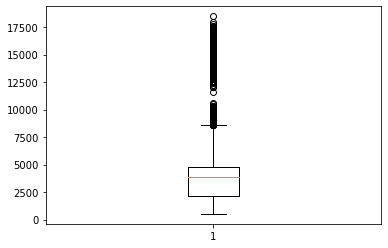

In [14]:
plt.boxplot(banco['Total_Trans_Amt'])

In [15]:
### EXPLICACION
### En este ejercicio se estratificó por las columnas 'Attrition_Flag', ya que conviene analizar solo los valores de cliente 
### existente; y 'Card_Category' dejando las categorias que mas frecuencia tienen en el dataset. Asi mismo los valores a 
### analizar son los valores que se encuentran en la variable continua 'Total_Trans_Amt' para ver la relacion que hay entre
### clientes existentes y el monto total de transsacciones.

In [16]:
banco.loc[:, ['Attrition_Flag']].value_counts()

Attrition_Flag   
Existing Customer    8500
Attrited Customer    1627
dtype: int64

In [17]:
banco.loc[:, ['Attrition_Flag']].value_counts()/banco.shape[0]

Attrition_Flag   
Existing Customer    0.83934
Attrited Customer    0.16066
dtype: float64

In [18]:
banco = banco.loc[banco['Attrition_Flag']=='Existing Customer']

In [19]:
banco.loc[:, ['Card_Category']].value_counts()

Card_Category
Blue             7917
Silver            473
Gold               95
Platinum           15
dtype: int64

In [20]:
banco.loc[:, ['Card_Category']].value_counts()/banco.shape[0]

Card_Category
Blue             0.931412
Silver           0.055647
Gold             0.011176
Platinum         0.001765
dtype: float64

In [21]:
banco = banco.loc[(banco['Card_Category']!='Gold') & (banco['Card_Category']!='Platinum')]

{'whiskers': [<matplotlib.lines.Line2D at 0x2676a1830d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2676a183670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2676a174dc0>],
 'medians': [<matplotlib.lines.Line2D at 0x2676a183c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x2676a183ee0>],
 'means': []}

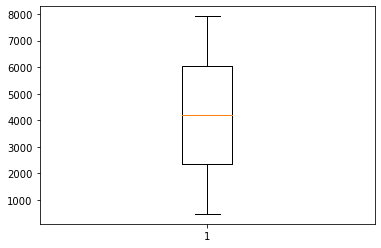

In [22]:
plt.boxplot(banco.loc[:, ['Card_Category']].value_counts())

In [23]:
bc = banco.loc[(banco['Attrition_Flag']=='Existing Customer') & (banco['Card_Category']=='Blue'), ['Total_Trans_Amt']]

{'whiskers': [<matplotlib.lines.Line2D at 0x2676a1f3580>,
 'caps': [<matplotlib.lines.Line2D at 0x2676a1f3b20>,
 'boxes': [<matplotlib.lines.Line2D at 0x2676a1f32b0>],
 'medians': [<matplotlib.lines.Line2D at 0x2676a201100>],
 'fliers': [<matplotlib.lines.Line2D at 0x2676a2013d0>],
 'means': []}

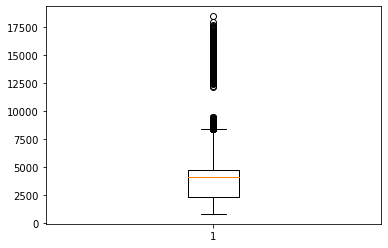

In [24]:
plt.boxplot(bc)

In [25]:
np.mean(bc['Total_Trans_Amt'])

4469.314386762662

In [26]:
q1 = np.quantile(bc , 0.25 )
q3 = np.quantile(bc , 0.75 )

In [27]:
q1

2313.0

In [28]:
q3

4735.0

In [29]:
iqr = q3 - q1

In [30]:
iqr

2422.0

In [31]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [32]:
upper_bound

8368.0

In [33]:
lower_bound

-1320.0

In [34]:
bc.loc[(bc['Total_Trans_Amt'] > upper_bound) | (bc['Total_Trans_Amt'] < lower_bound) , : ]

,Total_Trans_Amt
8581,8512
8590,8442
8591,8693
8624,8385
8650,8947
...,...
10116,15354
10117,17498
10120,15577
10121,14596


In [35]:
bcq1 = banco.loc[ : , ["Attrition_Flag","Card_Category","Total_Trans_Amt"] ].groupby( ["Attrition_Flag","Card_Category"] , as_index = False ).quantile(0.25)
bcq1.columns = ["Attrition_Flag","Card_Category","Total_Trans_Amt_q1"]

In [36]:
bcq3 = banco.loc[ : , ["Attrition_Flag","Card_Category","Total_Trans_Amt"] ].groupby( ["Attrition_Flag","Card_Category"] , as_index = False ).quantile(0.75)
bcq3.columns = ["Attrition_Flag","Card_Category","Total_Trans_Amt_q3"]

In [37]:
bcmean =banco.loc[ : , ["Attrition_Flag","Card_Category","Total_Trans_Amt"] ].groupby( ["Attrition_Flag","Card_Category"] , as_index = False ).mean()
bcmean.columns = ["Attrition_Flag","Card_Category","Total_Trans_Amt_mean"]

In [38]:
bcmean

,Attrition_Flag,Card_Category,Total_Trans_Amt_mean
0,Existing Customer,Blue,4469.314387
1,Existing Customer,Silver,6883.602537


In [39]:
bc_iqr = bcq1.merge( bcq3 , on=["Attrition_Flag","Card_Category"] , how="inner" ).merge( bcmean , on=["Attrition_Flag","Card_Category"] , how="inner" )

In [40]:
bc_iqr

,Attrition_Flag,Card_Category,Total_Trans_Amt_q1,Total_Trans_Amt_q3,Total_Trans_Amt_mean
0,Existing Customer,Blue,2313.0,4735.0,4469.314387
1,Existing Customer,Silver,3193.0,12592.0,6883.602537


In [41]:
bc_iqr["iqr"] = bc_iqr.apply( lambda r: r["Total_Trans_Amt_q3"] - r["Total_Trans_Amt_q1"] , axis = 1)

In [42]:
bc_iqr["upper"] = bc_iqr.apply( lambda r: ( r["Total_Trans_Amt_q3"] + 1.5*r["iqr"] ) , axis = 1)
bc_iqr["lower"] = bc_iqr.apply( lambda r: ( r["Total_Trans_Amt_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [43]:
bc_iqr

,Attrition_Flag,Card_Category,Total_Trans_Amt_q1,Total_Trans_Amt_q3,Total_Trans_Amt_mean,iqr,upper,lower
0,Existing Customer,Blue,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0
1,Existing Customer,Silver,3193.0,12592.0,6883.602537,9399.0,26690.5,-10905.5


In [44]:
bc_t = banco.merge(bc_iqr , on=["Attrition_Flag","Card_Category"] , how="left" ).copy()

In [45]:
bc_t

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Total_Trans_Amt_q1,Total_Trans_Amt_q3,Total_Trans_Amt_mean,iqr,upper,lower
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,0.000093,0.99991,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,0.000057,0.99994,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.000,0.000021,0.99998,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2.333,0.760,0.000134,0.99987,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.000,0.000022,0.99998,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,0.931,0.170,0.000192,0.99981,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0
8386,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,0.820,0.106,0.000516,0.99948,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0
8387,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,0.754,0.151,0.000038,0.99996,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0
8388,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,0.791,0.164,0.000148,0.99985,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0


In [46]:
def getTotal_Trans_Amt(r):
    if ( r["Total_Trans_Amt"] <= r["lower"] ) | ( r["Total_Trans_Amt"] >= r["upper"] ):
        return r["Total_Trans_Amt_mean"]
    else:
        return r["Total_Trans_Amt"]


In [47]:
bc_t.apply( lambda r: getTotal_Trans_Amt(r) , axis = 1 )

0       1144.000000
1       1291.000000
2       1887.000000
3       1171.000000
4        816.000000
           ...     
8385    4469.314387
8386    4469.314387
8387    4469.314387
8388    4469.314387
8389    4469.314387
Length: 8390, dtype: float64

In [48]:
bc_t["new_Total_Trans_Amt"] = bc_t.apply( lambda r: getTotal_Trans_Amt(r) , axis = 1 )

In [49]:
bc_t

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Total_Trans_Amt_q1,Total_Trans_Amt_q3,Total_Trans_Amt_mean,iqr,upper,lower,new_Total_Trans_Amt
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.061,0.000093,0.99991,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0,1144.000000
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.105,0.000057,0.99994,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0,1291.000000
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0.000,0.000021,0.99998,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0,1887.000000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0.760,0.000134,0.99987,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0,1171.000000
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0.000,0.000022,0.99998,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0,816.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,0.170,0.000192,0.99981,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0,4469.314387
8386,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,0.106,0.000516,0.99948,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0,4469.314387
8387,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,0.151,0.000038,0.99996,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0,4469.314387
8388,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,0.164,0.000148,0.99985,2313.0,4735.0,4469.314387,2422.0,8368.0,-1320.0,4469.314387


<AxesSubplot:xlabel='Attrition_Flag', ylabel='new_Total_Trans_Amt'>

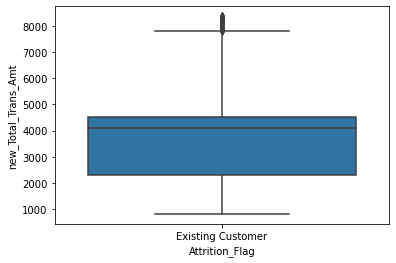

In [50]:
sns.boxplot( data=bc_t.loc[ (bc_t['Attrition_Flag']=='Existing Customer') & (bc_t['Card_Category'] == 'Blue'), : ]  , x="Attrition_Flag" , y="new_Total_Trans_Amt" )

In [129]:
#INICIO EJERCICIO 3

In [130]:
banco.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [131]:
banco_categoricas = [ 'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status','Income_Category', 'Card_Category', ]

In [132]:
#Columnas arriba de un 96% de diferencia en ellas
objetivo = .95

columnas_validas = []
columnas_arriba_96 = []
columnas_dos_niveles = []

for c_ in banco_categoricas:
    x = banco.loc[ : , [c_] ].drop_duplicates()
    dosquevalues = x.shape[0]
    
    if dosquevalues < 3:
        columnas_dos_niveles.append(c_)
    elif (dosquevalues/ banco.shape[0]) > objetivo:
        columnas_arriba_96.append(c_)
    else:
        columnas_validas.append(c_)

In [133]:
banco.loc[ : , columnas_dos_niveles ].drop_duplicates()

,Attrition_Flag,Gender
0,Existing Customer,M
1,Existing Customer,F
21,Attrited Customer,F
54,Attrited Customer,M


In [134]:
banco.loc[ : , columnas_arriba_96 ].drop_duplicates()

""
0
1
2
3
4
...
10122
10123
10124
10125


In [135]:
banco.loc[ : , columnas_validas ].drop_duplicates()

,Education_Level,Marital_Status,Income_Category,Card_Category
0,High School,Married,$60K - $80K,Blue
1,Graduate,Single,Less than $40K,Blue
2,Graduate,Married,$80K - $120K,Blue
3,High School,Unknown,Less than $40K,Blue
4,Uneducated,Married,$60K - $80K,Blue
...,...,...,...,...
9984,Doctorate,Single,Less than $40K,Gold
10029,Graduate,Married,$40K - $60K,Gold
10064,High School,Unknown,Less than $40K,Silver
10065,High School,Divorced,$60K - $80K,Silver


In [136]:
#TRATAMIENTO COLUMNA 'Education_Level'

In [137]:
frecuencia_E = banco.groupby( [ "Education_Level" ] , as_index = False ).agg({"CLIENTNUM" : [ "count" ] })

In [138]:
frecuencia_E.columns = frecuencia_E.columns.droplevel(1)

In [139]:
frecuencia_E['Porcentaje_Level'] = frecuencia_E['CLIENTNUM'] / banco.shape[0]

In [140]:
frecuencia_E = frecuencia_E.sort_values( ['Porcentaje_Level'] , ascending=False )

In [141]:
frecuencia_E
#Vamos a colocar como Others al porcentaje que tenga menos del 14% de nivel de educacion

,Education_Level,CLIENTNUM,Porcentaje_Level
2,Graduate,3128,0.308877
3,High School,2013,0.198776
6,Unknown,1519,0.149995
5,Uneducated,1487,0.146835
0,College,1013,0.100030
4,Post-Graduate,516,0.050953
1,Doctorate,451,0.044534


In [142]:
frecuencia_E['Education_Level_p'] = 'Others'

In [143]:
frecuencia_E['Education_Level_p'] = frecuencia_E.apply( lambda r: r['Education_Level'] if r['Porcentaje_Level'] > 0.14 else r['Education_Level_p'] ,axis = 1 )

In [144]:
frecuencia_E

,Education_Level,CLIENTNUM,Porcentaje_Level,Education_Level_p
2,Graduate,3128,0.308877,Graduate
3,High School,2013,0.198776,High School
6,Unknown,1519,0.149995,Unknown
5,Uneducated,1487,0.146835,Uneducated
0,College,1013,0.100030,Others
4,Post-Graduate,516,0.050953,Others
1,Doctorate,451,0.044534,Others


In [145]:
frecuencia_E = frecuencia_E.loc[ : , ['Education_Level','Education_Level_p'] ]

In [146]:
frecuencia_E.to_csv('Education_level.csv', index_label=False)

In [147]:
banco.merge( frecuencia_E , on=['Education_Level'] , how='left' )

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Education_Level_p
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,High School
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,Graduate
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,Graduate
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,High School
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,Uneducated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,Graduate
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,Unknown
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,High School
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,Graduate


In [148]:
#TRATAMIENTO DE COLUMNA 'Marital_Status'

In [149]:
frecuencia_m = banco.groupby( [ "Marital_Status" ] , as_index = False ).agg({"CLIENTNUM" : [ "count" ] })

In [150]:
frecuencia_m.columns = frecuencia_m.columns.droplevel(1)

In [151]:
frecuencia_m['Porcentaje'] = frecuencia_m['CLIENTNUM'] / banco.shape[0]

In [152]:
frecuencia_m = frecuencia_m.sort_values( ['Porcentaje'] , ascending=False )

In [153]:
frecuencia_m 
#Vamos a colocar como Others a todo lo que sea menor de 15% para lo que es el Marital_Status

,Marital_Status,CLIENTNUM,Porcentaje
1,Married,4687,0.462822
2,Single,3943,0.389355
3,Unknown,749,0.073961
0,Divorced,748,0.073862


In [154]:
frecuencia_m['Marital_Status_p'] = 'Others'

In [155]:
frecuencia_m['Marital_Status_p'] = frecuencia_m.apply( lambda r: r['Marital_Status'] if r['Porcentaje'] >= 0.15 else r['Marital_Status_p'] ,axis = 1 )

In [156]:
frecuencia_m

,Marital_Status,CLIENTNUM,Porcentaje,Marital_Status_p
1,Married,4687,0.462822,Married
2,Single,3943,0.389355,Single
3,Unknown,749,0.073961,Others
0,Divorced,748,0.073862,Others


In [157]:
frecuencia_m = frecuencia_m.loc[ : , ['Marital_Status','Marital_Status_p'] ]

In [158]:
frecuencia_m.to_csv('Marital_Status_level.csv', index_label=False)

In [159]:
banco.merge( frecuencia_m , on=['Marital_Status'] , how='left' )

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Marital_Status_p
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,Married
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,Single
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,Married
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,Others
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,Married
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,Single
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,Others
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,Married
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,Others


In [160]:
#TRATAMIENTO COLUMNA 'Income_Category'

In [161]:
frecuencia_c = banco.groupby( [ "Income_Category" ] , as_index = False ).agg({"CLIENTNUM" : [ "count" ] })

In [162]:
frecuencia_c.columns = frecuencia_c.columns.droplevel(1)

In [163]:
frecuencia_c['Porcentaje_income'] = frecuencia_c['CLIENTNUM'] / banco.shape[0]

In [164]:
frecuencia_c = frecuencia_c.sort_values( ['Porcentaje_income'] , ascending=False )

In [165]:
frecuencia_c
#Se tomara como Others a la categoria por debajo del 13% 

,Income_Category,CLIENTNUM,Porcentaje_income
4,Less than $40K,3561,0.351634
1,$40K - $60K,1790,0.176755
3,$80K - $120K,1535,0.151575
2,$60K - $80K,1402,0.138442
5,Unknown,1112,0.109805
0,$120K +,727,0.071788


In [166]:
frecuencia_c['Income_Category_P'] = 'Others'

In [167]:
frecuencia_c['Income_Category_P'] = frecuencia_c.apply( lambda r: r['Income_Category'] if r['Porcentaje_income'] >= 0.13 else r['Income_Category_P'] ,axis = 1 )

In [168]:
frecuencia_c

,Income_Category,CLIENTNUM,Porcentaje_income,Income_Category_P
4,Less than $40K,3561,0.351634,Less than $40K
1,$40K - $60K,1790,0.176755,$40K - $60K
3,$80K - $120K,1535,0.151575,$80K - $120K
2,$60K - $80K,1402,0.138442,$60K - $80K
5,Unknown,1112,0.109805,Others
0,$120K +,727,0.071788,Others


In [169]:
frecuencia_c = frecuencia_c.loc[ : , ['Income_Category','Income_Category_P'] ]

In [170]:
frecuencia_c.to_csv('Income_Category_level.csv', index_label=False)

In [171]:
banco.merge( frecuencia_c , on=['Income_Category'] , how='left' )

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Income_Category_P
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,$60K - $80K
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,Less than $40K
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,$80K - $120K
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,Less than $40K
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,$60K - $80K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,$40K - $60K
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,$40K - $60K
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,Less than $40K
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,$40K - $60K


In [172]:
#TRATAMIENTO DE LA COLUMNA 'Card_Category'

In [173]:
frecuencia_card = banco.groupby( [ "Card_Category" ] , as_index = False ).agg({"CLIENTNUM" : [ "count" ] })

In [174]:
frecuencia_card.columns = frecuencia_card.columns.droplevel(1)

In [175]:
frecuencia_card['Porcentaje_card'] = frecuencia_card['CLIENTNUM'] / banco.shape[0]

In [176]:
frecuencia_card = frecuencia_card.sort_values( ['Porcentaje_card'] , ascending=False )

In [177]:
frecuencia_card
#Vamos a tomar el porcentaje de la Card_Category como Others a los que sean menor de 6%

,Card_Category,CLIENTNUM,Porcentaje_card
0,Blue,9436,0.931767
3,Silver,555,0.054804
1,Gold,116,0.011455
2,Platinum,20,0.001975


In [178]:
frecuencia_card['Card_Category_P'] = 'Others'

In [179]:
frecuencia_card['Card_Category_P'] = frecuencia_card.apply( lambda r: r['Card_Category'] if r['Porcentaje_card'] > 0.06 else r['Card_Category_P'] ,axis = 1 )

In [180]:
frecuencia_card = frecuencia_card.loc[ : , ['Card_Category','Card_Category_P'] ]

In [181]:
frecuencia_card.to_csv('Card_Category.csv', index_label=False)

In [182]:
banco.merge( frecuencia_card , on=['Card_Category'] , how='left' )

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Card_Category_P
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.999910,Blue
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.999940,Blue
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.999980,Blue
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.999870,Blue
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.999980,Blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810,Blue
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729,Blue
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118,Blue
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294,Blue
